In [1]:
import os
import numpy as np
import astra
from arpys import dl, pp


In [2]:
paths = "./Cu111_LH19/"

files = [f for f in os.listdir(paths) if os.path.isfile(os.path.join(paths, f))]
files.sort()
files = files[::2]
data = []
for f in files:
    D = dl.load_data(os.path.join(paths, f))
    data.append(D.data[0])

data = np.array(data)

[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data with <class Dataloader_CASSIOPEE>.
[Dataloader CASSIOPEE] Loading from txt
[arpys]Loaded data w

In [3]:
data.shape

(86, 121, 595)

In [4]:
noise = astra.add_noise_to_sino(data[0,:,:], 1e3)

In [5]:
expansion_factor = 50

In [6]:
train_noise = np.zeros((data.shape[0]*expansion_factor, data.shape[1], data.shape[2]))
train_data = np.zeros((data.shape[0]*expansion_factor, data.shape[1], data.shape[2]))

for i in range(data.shape[0]):
    for j in range(expansion_factor):
        train_noise[i*(j+1),:,:] = astra.add_noise_to_sino(data[i,:,:], 1e3)
        train_data[i*(j+1),:,:] = data[i,:,:]

In [7]:
train_noise.shape

(4300, 121, 595)

In [8]:
train_data.shape

(4300, 121, 595)

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.imshow(noise[48,:,:])

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

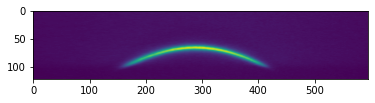

In [11]:
plt.imshow(data[48,:,:])

In [13]:
4300*0.75

3225.0

In [14]:
np.save('train_noise.npy', train_noise[0:3225,:,:])

In [15]:
np.save('train_data.npy', train_data[0:3225,:,:])

In [16]:
np.save('validation_noise.npy', train_noise[3225:,:,:])

In [17]:
np.save('validation_data.npy', train_data[3225:,:,:])